### Task#1 Read lab document carefully and create a python notebook from the given instructions ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
#2D data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
#1D data to dense layer
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

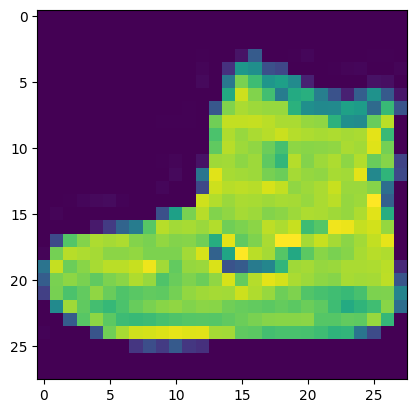

In [4]:
plt.imshow(x_train[0].reshape(28,28))

In [5]:
from keras.models import Model
from keras.layers import Input, Dense
input_dim = x_train.shape[1]
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.compile(optimizer='adam', 
loss='binary_crossentropy')
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = autoencoder.fit(x_train, x_train,
 epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 9s 30ms/step - loss: 0.4137 - val_loss: 0.3421
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3272 - val_loss: 0.3198
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3108 - val_loss: 0.3069
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.3009 - val_loss: 0.2995
Epoch 5/50
235/235 [==============================] - 6s 25ms/step - loss: 0.2950 - val_loss: 0.2949
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.2912 - val_loss: 0.2919
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2887 - val_loss: 0.2900
Epoch 8/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2872 - val_loss: 0.2887
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.2862 - val_loss: 0.2880
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2854 - val_l

In [8]:
reconstructed_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 3s 8ms/step


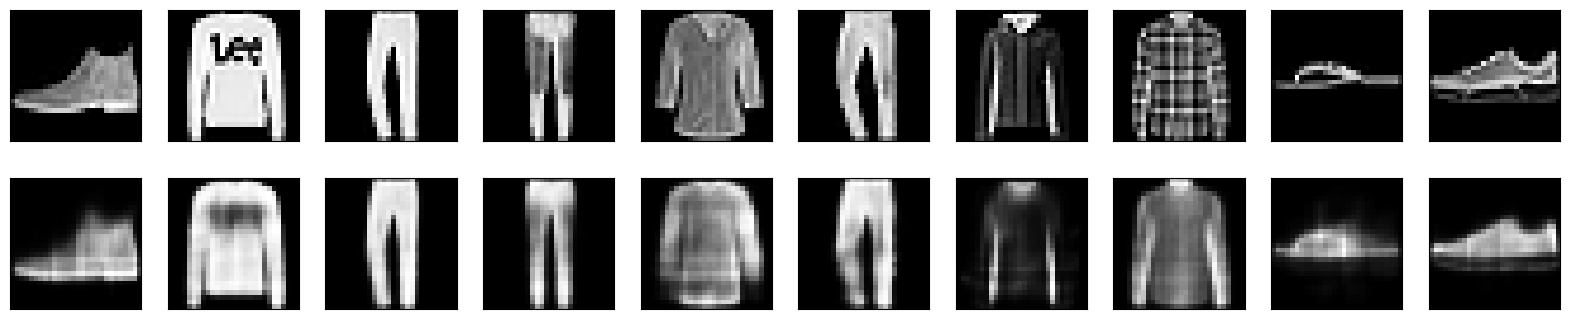

In [16]:
n = 10 # How many images to display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original images
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstructed images
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(reconstructed_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()


### Task #2 Design an autoencoder architecture with three dense layers in the encoder and decoder block for the Fashion MNIST dataset. These dense layers will have decreasing number of neurons starting from 128, 64, and 32 in encoder block and an increasing number of neurons from 32, 64 to 128 in the decoder block to match dimensions as input data ###

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [13]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape


((60000, 784), (10000, 784))

In [ ]:
plt.imshow(x_train[0].reshape(28,28))


In [19]:
from keras.models import Model
from keras.layers import Input, Dense
input_dim = x_train.shape[1]
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)


In [20]:
autoencoder.compile(optimizer='adam', 
loss='binary_crossentropy')
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      


                                                                 
 dense_9 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 222384 (868.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = autoencoder.fit(x_train, x_train,
 epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 12s 39ms/step - loss: 0.3775 - val_loss: 0.3179
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.3102 - val_loss: 0.3077
Epoch 3/50
235/235 [==============================] - 8s 33ms/step - loss: 0.3021 - val_loss: 0.3023
Epoch 4/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2977 - val_loss: 0.2979
Epoch 5/50
235/235 [==============================] - 8s 35ms/step - loss: 0.2947 - val_loss: 0.2953
Epoch 6/50
235/235 [==============================] - 8s 34ms/step - loss: 0.2921 - val_loss: 0.2950
Epoch 7/50
235/235 [==============================] - 7s 29ms/step - loss: 0.2903 - val_loss: 0.2913
Epoch 8/50
235/235 [==============================] - 8s 33ms/step - loss: 0.2885 - val_loss: 0.2902
Epoch 9/50
235/235 [==============================] - 7s 31ms/step - loss: 0.2871 - val_loss: 0.2889
Epoch 10/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2859 - val_l

In [22]:
reconstructed_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 2s 5ms/step


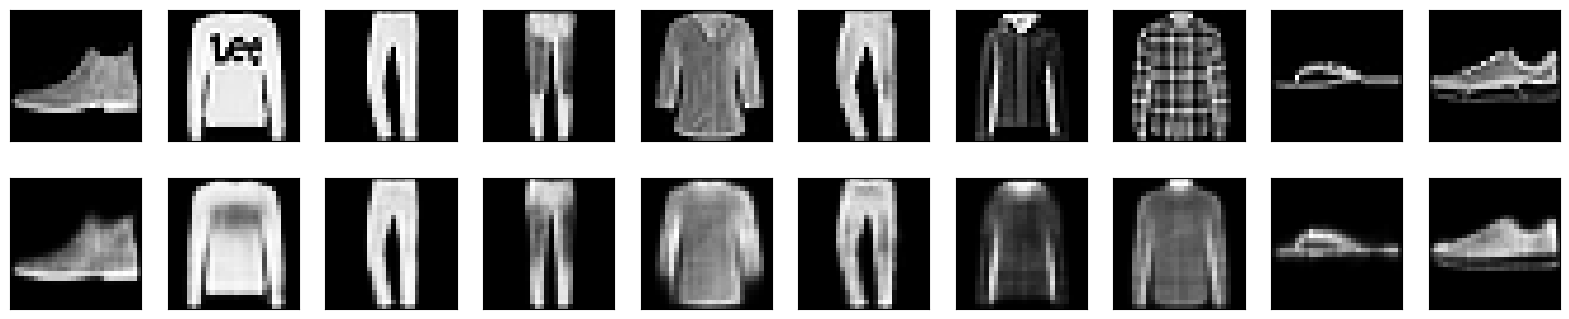

In [24]:
n = 10 # How many images to display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original images
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstructed images
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(reconstructed_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

### Task 3. Design a shallow and deep autoencoder architecture for MNIST handwritten digits and compare the performance of both the models ### 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

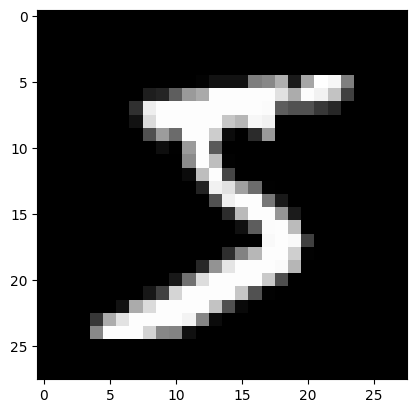

In [28]:
plt.imshow(x_train[0].reshape(28,28))

In [29]:
from keras.models import Model
from keras.layers import Input, Dense
input_dim = x_train.shape[1]
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

In [30]:
autoencoder.compile(optimizer='adam', 
loss='binary_crossentropy')
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 784)               1011

In [31]:
history = autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 13s 37ms/step - loss: 0.2376 - val_loss: 0.1622
Epoch 2/50
235/235 [==============================] - 8s 36ms/step - loss: 0.1461 - val_loss: 0.1342
Epoch 3/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1298 - val_loss: 0.1240
Epoch 4/50
235/235 [==============================] - 8s 32ms/step - loss: 0.1222 - val_loss: 0.1176
Epoch 5/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1159 - val_loss: 0.1111
Epoch 6/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1100 - val_loss: 0.1063
Epoch 7/50
235/235 [==============================] - 7s 31ms/step - loss: 0.1064 - val_loss: 0.1038
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1041 - val_loss: 0.1019
Epoch 9/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1024 - val_loss: 0.1003
Epoch 10/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1008 - val_l

In [32]:
reconstructed_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 3s 10ms/step


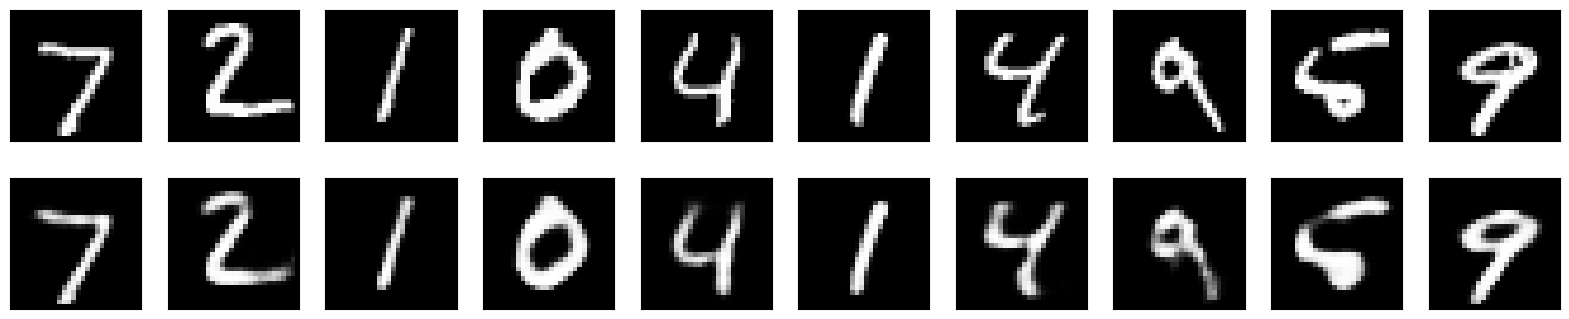

In [33]:
n = 10 # How many images to display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original images
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstructed images
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(reconstructed_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()